<a href="https://colab.research.google.com/github/SanjeevReddy61/Projects/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Multiclass classification using CNN on CIFAR-10 images DataSet **

In [133]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import numpy as np

In [134]:
#Loading and spliting of the Data
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [135]:
x_train.shape

(50000, 32, 32, 3)

In [132]:
y_train.shape

(50000,)

In [136]:
#Reshaping the data 2D->1D
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [137]:
y_train.shape

(50000,)

In [138]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

* 0 --> airplane
* 1 --> automobile
* 2 --> bird
* 3 --> cat
* 4 --> deer
* 5 --> dog
* 6 --> frog
* 7 --> horse
* 8 --> ship
* 9 --> truck

In [90]:

classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [139]:
classes[6]

'frog'

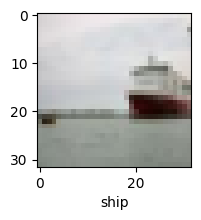

In [142]:
#ploting the random samples
def plot_sample(x,y,index):
  plt.figure(figsize=(7,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
plot_sample(x_train,y_train,np.random.randint(0,5000,dtype=int))

In [143]:
#Normalizing the data
x_train=x_train/255.0
x_test=x_test/255.0

In [94]:
#create the model
model = models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fit the model
history=model.fit(x_train,y_train,
          epochs=10,
          validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 123ms/step - accuracy: 0.3768 - loss: 1.7767 - val_accuracy: 0.5405 - val_loss: 1.2911
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 123ms/step - accuracy: 0.5742 - loss: 1.1826 - val_accuracy: 0.5259 - val_loss: 1.4091
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 124ms/step - accuracy: 0.6563 - loss: 0.9699 - val_accuracy: 0.7080 - val_loss: 0.8412
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 122ms/step - accuracy: 0.6945 - loss: 0.8592 - val_accuracy: 0.6946 - val_loss: 0.8540
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 126ms/step - accuracy: 0.7141 - loss: 0.8024 - val_accuracy: 0.6708 - val_loss: 0.9916
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 123ms/step - accuracy: 0.7334 - loss: 0.7545 - val_accuracy: 0.7358 - val_loss: 0.7499
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 125ms/step - accuracy: 0.7450 - loss: 0.7206 - val_accuracy: 0.7173 - val_loss: 0.8248
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 121ms/step - ac

(0.5, 1.0)

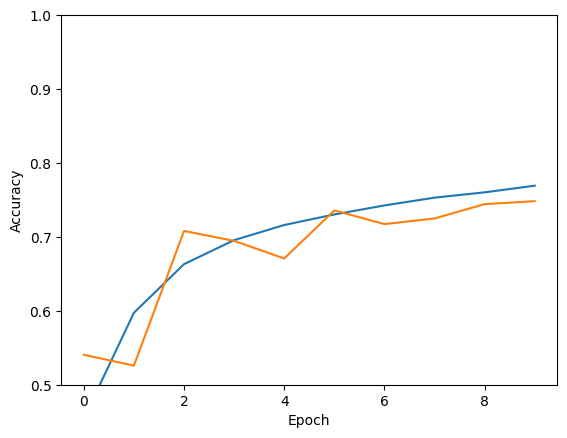

In [114]:
#ploting accuracy
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])

In [115]:
# calculating the accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7484 - loss: 0.7195
Test Accuracy: 0.75


In [116]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_classes))


              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1000
           1       0.84      0.89      0.87      1000
           2       0.74      0.55      0.63      1000
           3       0.54      0.64      0.59      1000
           4       0.73      0.73      0.73      1000
           5       0.71      0.58      0.64      1000
           6       0.77      0.85      0.81      1000
           7       0.84      0.78      0.81      1000
           8       0.78      0.88      0.83      1000
           9       0.75      0.90      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [125]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [126]:
y_pred_classes[:5]

array([3, 1, 8, 0, 6])

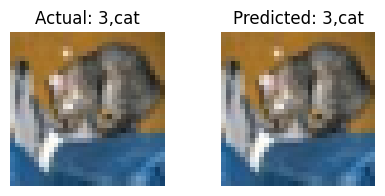

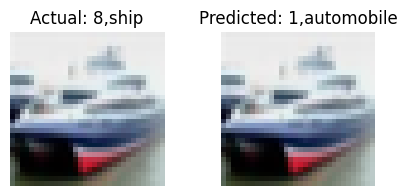

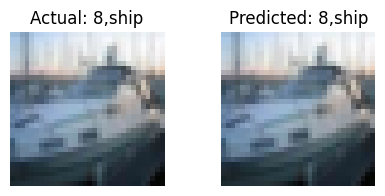

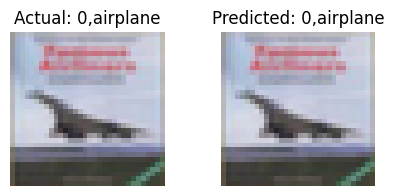

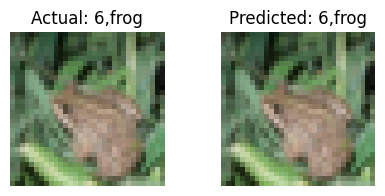

In [130]:
for i in range(5):
  plt.figure(figsize=(5, 2)) # Create a new figure for each pair of images
  plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
  plt.imshow(x_test[i])
  plt.title(f"Actual: {y_test[i]},{classes[y_test[i]]}")
  plt.axis('off')

  plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
  # We are plotting the image again here, but will add the predicted label
  plt.imshow(x_test[i])
  plt.title(f"Predicted: {y_pred_classes[i]},{classes[y_pred_classes[i]]}")
  plt.axis('off') # Hide axes

  plt.show()